In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### Kasus 2:
#### Pertanyaan:
<ul>
<li>Load dataset yang diberikan ke komputer</li>
<li>Identifikasi atribut data  fitur dan target</li>
<li> tampilkan statistik dan distribusi data setiap kolom </li>
<li>Lakukan pembersihan data jika diperlukan: missing value, outlier, inconsistent data, dll</li>
<li>Lakukan encoding untuk data non-numerik menjadi numerik</li>
<li>Lakukan analisis univariate: deskripsi data, outlier data, distribusi data</li>
</ul>

In [114]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
""" 
tampilkan tipe data setiap kolom, 
identifikasi jumlah baris dan kolom dan keberadaan missing value
"""

' \ntampilkan tipe data setiap kolom, \nidentifikasi jumlah baris dan kolom dan keberadaan missing value\n'

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ol>
    <li> buat catatan kesesuaian tipe data dengan hasil pemahaman terhadap data berdasarkan meta data di sini !</li>
    <li>buat catatan kolom yang mengandung inkonsistensi tipe data</li>
    <li>buat catatan kolom yang mengadung missing value dan apa keputusan yang akan diambil </li>
    <li> tentukan kandidat fitur dan target</li>
    </ol>

In [117]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Penanganan missing value pada Age
Ada 177 missing value dari 891 baris data. 
untuk mengisi missing value, maka perlu dicek terlebih dahulu distribusi datanya. jika skew maka lebih tepat digunakan median dari pada mean karena pengisian dengan mean bisa menyebabkan bias. 

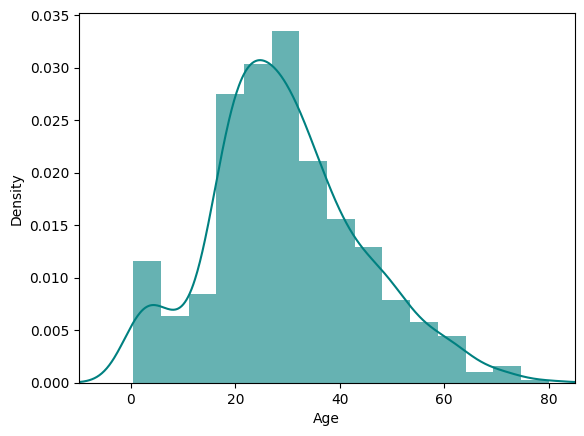

In [118]:
# cek distribusi Sex menggunakan fungsi hist
import matplotlib.pyplot as plt 
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [119]:
#imputasi dengan median pada kolom 'Age'
df['Age'].fillna(df['Age'].median(),inplace=True)
df.info()
#bisa dicoba untuk fillna dengan nilai mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


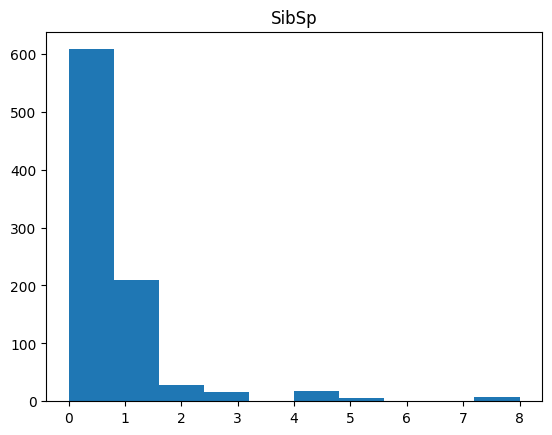

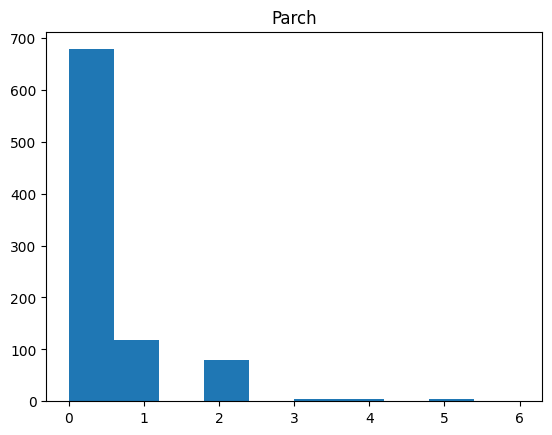

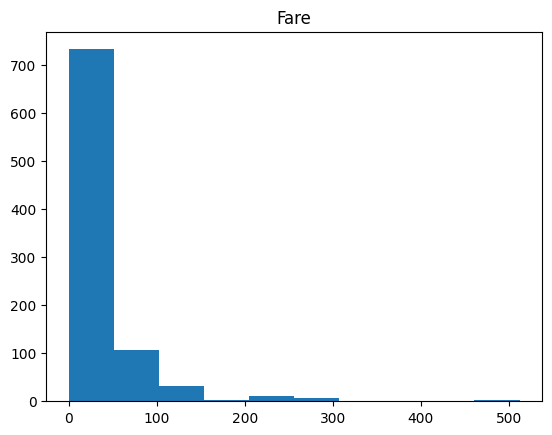

In [120]:
df_num = df[['SibSp','Parch','Fare']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_num_scaled = df.copy()
data_num_scaled[['Age','SibSp','Parch','Fare']]= scale.fit_transform(df[['Age','SibSp','Parch','Fare']])
data_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ KB


#cek hubungan antara fitur Age, SibSp, Parch, dan Fare terhadap Survived

In [122]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


In [123]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']
for i,col in enumerate(cols):
    #print(i)
    print(f'nilai unik pada{col}:{pd.unique(df[col])}')

nilai unik padaSurvived:[0 1]
nilai unik padaPclass:[3 1 2]
nilai unik padaSex:['male' 'female']
nilai unik padaAge:[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
nilai unik padaSibSp:[1 0 3 4 2 5 8]
nilai unik padaParch:[0 1 2 5 3 4 6]
nilai unik padaEmbarked:['S' 'C' 'Q' nan]


#### Pemrosesan Data Kategorik

In [124]:
#ada dua baris data kolom 'Embarked' bernilai null. cara paling mudah adalah di dropna
df.dropna(axis=0,subset=['Embarked'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


<ul>
    <li>'PassengerId' --> unik pada setiap baris--> didrop</li>
    <li>'Cabin' --> terlalu banyak yang kosong ---> didrop</li>
    <li>'Ticket' ---> cek keunikan jika terlalu banyak nilai unik berarti tidak mengandung informasi --> didrop</li>
    </ul>


In [125]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
df.drop(labels=['PassengerId','Cabin','Ticket'],axis=1, inplace=True)

In [127]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [128]:
# 'Survived'---> variabel target --> kategorik
df['Survived'] = df['Survived'].astype('category')
df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    int64   
 2   Name      889 non-null    object  
 3   Sex       889 non-null    object  
 4   Age       889 non-null    float64 
 5   SibSp     889 non-null    int64   
 6   Parch     889 non-null    int64   
 7   Fare      889 non-null    float64 
 8   Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 63.5+ KB


In [130]:
pd.unique(df.Embarked)

array(['S', 'C', 'Q'], dtype=object)

In [131]:
from sklearn.preprocessing import OneHotEncoder
# gunakan one hot encoder untuk merubah tipe data kategorik nominal 
encoder = OneHotEncoder()
# 'Embarked'--> kategorik tipe nominal
#df['___']= df['__'].__('__')

embarked_onehot = encoder.fit_transform(df[['Embarked']]).toarray()
#print(encoder.feature_names_in_)
one_hot_df = pd.DataFrame(embarked_onehot, columns=encoder.get_feature_names_out())
one_hot_df.head()
# 'Sex' --> kategorik tipe nominal --> 


,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [132]:
df.drop(['Embarked'],axis=1,inplace=True)
df = pd.concat([df,one_hot_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    889 non-null    category
 1   Pclass      889 non-null    float64 
 2   Name        889 non-null    object  
 3   Sex         889 non-null    object  
 4   Age         889 non-null    float64 
 5   SibSp       889 non-null    float64 
 6   Parch       889 non-null    float64 
 7   Fare        889 non-null    float64 
 8   Embarked_C  889 non-null    float64 
 9   Embarked_Q  889 non-null    float64 
 10  Embarked_S  889 non-null    float64 
dtypes: category(1), float64(8), object(2)
memory usage: 77.6+ KB


In [133]:
pd.unique(df.Sex)

array(['male', 'female', nan], dtype=object)

In [134]:
df.dropna(axis=0,subset=['Sex'],inplace=True)
df['Sex'] = df['Sex'].astype('category')
pd.unique(df.Sex)

['male', 'female']
Categories (2, object): ['female', 'male']

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    889 non-null    category
 1   Pclass      889 non-null    float64 
 2   Name        889 non-null    object  
 3   Sex         889 non-null    category
 4   Age         889 non-null    float64 
 5   SibSp       889 non-null    float64 
 6   Parch       889 non-null    float64 
 7   Fare        889 non-null    float64 
 8   Embarked_C  887 non-null    float64 
 9   Embarked_Q  887 non-null    float64 
 10  Embarked_S  887 non-null    float64 
dtypes: category(2), float64(8), object(1)
memory usage: 71.4+ KB


In [136]:
encoder = OneHotEncoder()
sex_onehot = encoder.fit_transform(df[['Sex']]).toarray()
sex_one_hot_df = pd.DataFrame(sex_onehot, columns=encoder.get_feature_names_out())
sex_one_hot_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [137]:
df.drop(['Sex'],axis=1,inplace=True)
df = pd.concat([df,sex_one_hot_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    889 non-null    category
 1   Pclass      889 non-null    float64 
 2   Name        889 non-null    object  
 3   Age         889 non-null    float64 
 4   SibSp       889 non-null    float64 
 5   Parch       889 non-null    float64 
 6   Fare        889 non-null    float64 
 7   Embarked_C  887 non-null    float64 
 8   Embarked_Q  887 non-null    float64 
 9   Embarked_S  887 non-null    float64 
 10  Sex_female  889 non-null    float64 
 11  Sex_male    889 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usage: 84.5+ KB


In [138]:
df.dropna(axis=0,subset=['Embarked_C','Embarked_Q','Embarked_S'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 0 to 888
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    category
 1   Pclass      887 non-null    float64 
 2   Name        887 non-null    object  
 3   Age         887 non-null    float64 
 4   SibSp       887 non-null    float64 
 5   Parch       887 non-null    float64 
 6   Fare        887 non-null    float64 
 7   Embarked_C  887 non-null    float64 
 8   Embarked_Q  887 non-null    float64 
 9   Embarked_S  887 non-null    float64 
 10  Sex_female  887 non-null    float64 
 11  Sex_male    887 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usage: 84.1+ KB


In [139]:

# 'Pclass' --> int (fitur bertipe kategorik) --> dilakukan encoding dengan ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
or_enc = OrdinalEncoder()
pclass_encod = or_enc.fit_transform(df[['Pclass']])
pclass_df = pd.DataFrame(pclass_encod, columns = or_enc.get_feature_names_out())
pclass_df.head()


,Pclass
0,2.0
1,0.0
2,2.0
3,0.0
4,2.0


In [140]:
df.drop(['Pclass'],axis=1,inplace=True)
df = pd.concat([df,pclass_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    category
 1   Name        887 non-null    object  
 2   Age         887 non-null    float64 
 3   SibSp       887 non-null    float64 
 4   Parch       887 non-null    float64 
 5   Fare        887 non-null    float64 
 6   Embarked_C  887 non-null    float64 
 7   Embarked_Q  887 non-null    float64 
 8   Embarked_S  887 non-null    float64 
 9   Sex_female  887 non-null    float64 
 10  Sex_male    887 non-null    float64 
 11  Pclass      887 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usage: 84.3+ KB


In [141]:
df.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass'],
      dtype='object')

In [142]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df = df.copy()
df[['Age','SibSp','Parch','Fare']]= scale.fit_transform(df[['Age','SibSp','Parch','Fare']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    category
 1   Name        887 non-null    object  
 2   Age         887 non-null    float64 
 3   SibSp       887 non-null    float64 
 4   Parch       887 non-null    float64 
 5   Fare        887 non-null    float64 
 6   Embarked_C  887 non-null    float64 
 7   Embarked_Q  887 non-null    float64 
 8   Embarked_S  887 non-null    float64 
 9   Sex_female  887 non-null    float64 
 10  Sex_male    887 non-null    float64 
 11  Pclass      887 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usage: 84.3+ KB


In [143]:
df_copy1 = df[['Survived','SibSp','' 'Age','Parch','Embarked_C','Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male','Pclass']].copy(deep=True)
df_copy1.dropna()
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 829
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    category
 1   SibSp       887 non-null    float64 
 2   Age         887 non-null    float64 
 3   Parch       887 non-null    float64 
 4   Embarked_C  887 non-null    float64 
 5   Embarked_Q  887 non-null    float64 
 6   Embarked_S  887 non-null    float64 
 7   Sex_female  887 non-null    float64 
 8   Sex_male    887 non-null    float64 
 9   Pclass      887 non-null    float64 
dtypes: category(1), float64(9)
memory usage: 70.4 KB


### seleksi fitur dengan chi-square


In [144]:
df_copy1.isna().sum()


Survived      2
SibSp         2
Age           2
Parch         2
Embarked_C    2
Embarked_Q    2
Embarked_S    2
Sex_female    2
Sex_male      2
Pclass        2
dtype: int64

In [145]:
cols = df_copy1.columns
for i, col in enumerate(cols):
    print(pd.unique(df_copy1[col]))

[0, 1, NaN]
Categories (2, int64): [0, 1]
[ 0.42990395 -0.47585568  2.2414232   3.14718282  1.33566357  4.05294245
  6.77022132         nan]
[-0.56312858  0.66844969 -0.25523401  0.43752877 -0.10128673  1.90002796
 -2.10260141 -0.17826037 -1.17891771 -1.94865412  2.20792252 -0.71707586
  0.74542333  1.9770016   0.1296342   0.36055512 -1.10194407 -1.64075956
 -0.7940495   0.82239697  2.82371166  0.97634426 -0.64010222 -0.87102314
 -2.02562777 -1.7177332   1.51515975 -0.02431308  2.74673802 -0.0627999
 -1.87168048 -1.40983863  1.20726518 -0.94799678  0.20660784 -1.02497042
 -0.33220765 -2.19266057  0.05266056  0.28358148 -0.48615493 -0.40918129
  1.28423882  2.28489617  3.20857986  0.59147605  1.36121247 -1.14043089
  3.17009304  0.24509466 -1.33286499 -1.56378592  0.55298923  1.66910703
  2.01548842  0.8608838   1.13029154 -2.17957505  2.43884345  2.05397524
  1.59213339  0.51450241  1.245752   -0.67858904  2.51581709  0.89937062
  1.74608067  2.59279073 -0.44766811 -2.18573294  1.05331

In [146]:
#df.columns
#X = df[['Embarked_C','Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',]].copy(deep=True)
X = df_copy1.drop(['Survived'],axis=1)
y = df_copy1['Survived'].copy(deep=True)

In [147]:
#np.where(np.asanyarray(np.isnan(X)))

In [148]:
df_copy1.tail(10)

,Survived,SibSp,Age,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass
881,0,-0.475856,0.283581,-0.474981,0.0,0.0,1.0,0.0,1.0,1.0
882,0,-0.475856,-0.563129,-0.474981,0.0,0.0,1.0,0.0,1.0,2.0
883,0,-0.475856,-0.101287,-0.474981,0.0,1.0,0.0,1.0,0.0,2.0
884,0,-0.475856,-0.332208,-0.474981,0.0,0.0,1.0,0.0,1.0,1.0
885,0,-0.475856,0.745423,5.720725,0.0,0.0,1.0,1.0,0.0,0.0
886,0,-0.475856,-0.178260,-0.474981,0.0,0.0,1.0,1.0,0.0,2.0
887,1,-0.475856,-0.794049,-0.474981,1.0,0.0,0.0,0.0,1.0,NaN
888,0,0.429904,-0.101287,2.003301,0.0,1.0,0.0,0.0,1.0,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [149]:
df_copy1.drop([887,888,61,829],inplace=True)
df_copy1.tail(10)

,Survived,SibSp,Age,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass
877,0,-0.475856,-0.794049,-0.474981,1.0,0.0,0.0,1.0,0.0,0.0
878,0,-0.475856,-0.101287,-0.474981,0.0,0.0,1.0,1.0,0.0,1.0
879,1,-0.475856,2.053975,0.764160,0.0,0.0,1.0,0.0,1.0,2.0
880,1,-0.475856,-0.332208,0.764160,0.0,0.0,1.0,1.0,0.0,2.0
881,0,-0.475856,0.283581,-0.474981,0.0,0.0,1.0,0.0,1.0,1.0
882,0,-0.475856,-0.563129,-0.474981,0.0,0.0,1.0,0.0,1.0,2.0
883,0,-0.475856,-0.101287,-0.474981,0.0,1.0,0.0,1.0,0.0,2.0
884,0,-0.475856,-0.332208,-0.474981,0.0,0.0,1.0,0.0,1.0,1.0
885,0,-0.475856,0.745423,5.720725,0.0,0.0,1.0,1.0,0.0,0.0
886,0,-0.475856,-0.178260,-0.474981,0.0,0.0,1.0,1.0,0.0,2.0


In [150]:
df_copy1.isna().sum()

Survived      0
SibSp         0
Age           0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
Pclass        0
dtype: int64

In [151]:
y = df_copy1['Survived']
X = df_copy1.drop('Survived',axis=1)

dokumentasi chi2: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [152]:
"""
#menerapkan chi-square untuk pemilihan fitur
from sklearn.feature_selection import chi2
fitur = chi2(X,y)
fitur

pvalues = pd.Series(fitur[1])
pvalues.index = X.columns

pvalues
"""

'\n#menerapkan chi-square untuk pemilihan fitur\nfrom sklearn.feature_selection import chi2\nfitur = chi2(X,y)\nfitur\n\npvalues = pd.Series(fitur[1])\npvalues.index = X.columns\n\npvalues\n'

p_values pada dataset tidak ada yang kurang dari 0.05. bisa dipilih yang nilainya kecil (Embarked_Q) dengan p values = 0.240262

In [153]:
"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 4)
X_kbest_features = chi2_features.fit_transform(X, y)
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

X_kbest_features
"""

"\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\nchi2_features = SelectKBest(chi2, k = 4)\nX_kbest_features = chi2_features.fit_transform(X, y)\n# Reduced features\nprint('Original feature number:', X.shape[1])\nprint('Reduced feature number:', X_kbest_features.shape[1])\n\nX_kbest_features\n"

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 0)


In [155]:
"""
from keras.models import Sequential, Model
from keras.layers import Dense, Input

perceptron_model = Sequential()
perceptron_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='normal'))

perceptron_model.compile(loss='binary_crossentropy', optimizer='adam')
#training
perceptron_model.fit(X_train, y_train, epochs=100)
"""

"\nfrom keras.models import Sequential, Model\nfrom keras.layers import Dense, Input\n\nperceptron_model = Sequential()\nperceptron_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='normal'))\n\nperceptron_model.compile(loss='binary_crossentropy', optimizer='adam')\n#training\nperceptron_model.fit(X_train, y_train, epochs=100)\n"

In [156]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

ann_model = Sequential()
#ann_model.add(Input(shape=(X.shape[1],)))
#first hidden layers
ann_model.add(Dense(units=8,activation='relu'))
#second hidden layers
#ann_model.add(Dense(units=6,activation='relu'))
ann_model.add(Dense(units=4,activation='relu'))
#output layers tergantung jumlah kelas
ann_model.add(Dense(units=1,activation='sigmoid'))

In [157]:
#compiling nn model
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # categorical_crossentropy if multiclass


In [158]:
#train ann_model
ann_model.fit(X_train,y_train,batch_size=5,epochs=100)

ValueError: Invalid dtype: category

In [ ]:
data =np.array(X_test.loc[1]).reshape(1,-1)
data

In [ ]:
pred = np.array([ann_model.predict(data) > 0.5]).astype(int)[0]
pred

In [ ]:
#save model to pickle

In [ ]:
#load model dari pickle


In [ ]:
#menggunakan model untuk prediksi
#proses deploy user menginput data yang akan diprediksi kemudian menggunakan model untuk memprediksi

In [ ]:
#predict data train
y_train_pred=np.array([ann_model.predict(X_train) > 0.5]).astype(int)[0]
#predict data test
y_test_pred=np.array([ann_model.predict(X_test)>0.5]).astype(int)[0]


In [ ]:
y_train.shape

In [ ]:
y_train_pred.shape

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_train = confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)

In [ ]:
# Visualize the confusion matrix of confusion_matrix_train using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Visualize the confusion matrix using Seaborn
#confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
#print(confusion_matrix_test)

In [ ]:
# Calculate Precision, Recall and F1 Score
precision = precision_score(y_test, y_pred )
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features,y, test_size = 0.25,random_state = 0)
logreg = LogisticRegression()
logreg.fit (X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

#### 'Age' --> numerik --> kemungkinan bisa diubah menjadi kategorik sehingga lebih bermakna
####                   ----> mengandung banyak nilai null 
#### 'SibSp',---> numerik
#### 'Parch',---> numerik
#### 'Fare'--> harga tiket (numerik) --> rekayasa fitur dengan binning 

In [ ]:
df[ ['Age', 'SibSp', 'Parch', 'Fare']].describe()

In [ ]:
# boxplot
import matplotlib.pyplot as plt
column_for_boxplot = ['Age', 'SibSp', 'Parch', 'Fare']
for col in column_for_boxplot:
    plt.figure()
    df.boxplot(column=[col])

#### fitur numerik mana saja yang mengandung outlier?

In [ ]:
# cek korelasi fitur numerik
import seaborn as sns
sns.heatmap(df[['Age', 'SibSp', 'Parch', 'Fare','Survived']].corr(), annot= True)

In [ ]:
# 'Name' --> bisa diparsing diambil gelarnya (Mrs, Miss, Mrs)--> kategorik tipe nominal
#split_name = df['Name'].str.split()
#gelar = [nama[1] for nama in split_name]
df['Title_step1'] = df['Name'].str.split(', ', expand=True)[1] #.str.split('.', expand=True)[0]
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
pd.unique(df.Title)

In [ ]:
nama = 'Braund, Mr. Owen Harris'
sp_nama = nama.split()
sp_nama

In [ ]:
#lakukan penanganan missing value 

In [ ]:
# cek 

In [ ]:
# tampilkan statistik data setiap kolom bertipe numerik
#df.___


In [ ]:
#tampilkan distribusi data setiap kolom numerik dengan histogram
df[___].___

Lakukan kategorisasi kolom berdistribusi normal atau mendekati normal atau skew

In [ ]:
# tampilkan boxplot setiap kolom untuk mengidentifikasi keberadaan outlier
df[___].____

#### Kasus 3
#### Pertanyaan
<ol>
<li>Tetapkan atribut data mana yang perlu dilakukan rekayasa fitur?</li>
<li>Lakukan rekayasa fitur dari atribut yang telah ditetapkan. Gunakan metode rekayasa fitur yang sesuai dan berikan argumennya </li>
<li>Lakukan analisis univariate dan multivariate dari fitur yang sudah direkayasa. </li>
<li>Lakukan komparasi dengan fitur aslinya dan jelaskan apakah fitur rekayasa lebih baik? Berikan argumen nya</li>
    </ol>


In [ ]:
referensi : https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder
        